In [ ]:
%pip install networkx">=2.5"
%pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
dieta = ctrl.Antecedent(np.arange(0, 5001, 1), 'dieta')
exercicio = ctrl.Antecedent(np.arange(0, 2001, 1), 'exercicio')
risco = ctrl.Consequent(np.arange(0, 101, 1), 'risco')

dieta['baixa'] = fuzz.trimf(dieta.universe, [0, 0, 5000])
dieta['alta'] = fuzz.trimf(dieta.universe, [2500, 2500, 5000])

exercicio['baixo'] = fuzz.trimf(exercicio.universe, [0, 0, 2000])
exercicio['alto'] = fuzz.trimf(exercicio.universe, [1000, 1000, 2000])

risco['baixo'] = fuzz.trimf(risco.universe, [0, 0, 100])
risco['alto'] = fuzz.trimf(risco.universe, [50, 50, 100])

In [4]:
regra1 = ctrl.Rule(dieta['baixa'] & exercicio['alto'], risco['baixo'])
regra2 = ctrl.Rule(dieta['alta'] | exercicio['baixo'], risco['alto'])

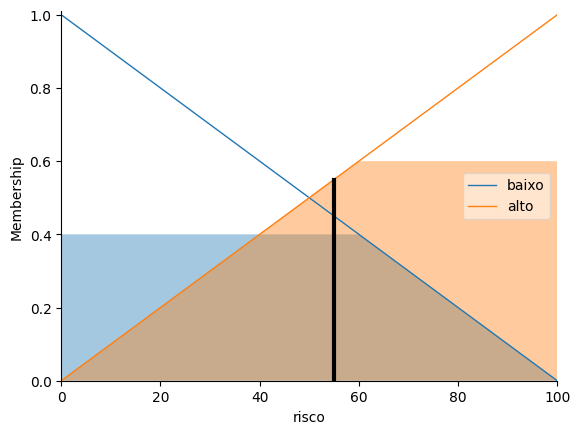

In [8]:
sistema_controle = ctrl.ControlSystem([regra1, regra2])
simulacao = ctrl.ControlSystemSimulation(sistema_controle)

simulacao.input['dieta'] = 3000
simulacao.input['exercicio'] = 1000

simulacao.compute()

risco.view(sim=simulacao)